In [2]:
pip install yfinance pandas matplotlib


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2021-01-01  2700.906738  2711.744493  2655.480406  2656.402768  2681440
2021-01-04  2803.472900  2813.895635  2712.620251  2720.967671  5113293
2021-01-05  2852.865234  2872.465424  2803.611201  2803.611201  5801309
2021-01-06  2814.586914  2871.773343  2801.397096  2859.321459  3726716
2021-01-07  2797.339600  2841.659140  2767.316671  2836.263232  3717827


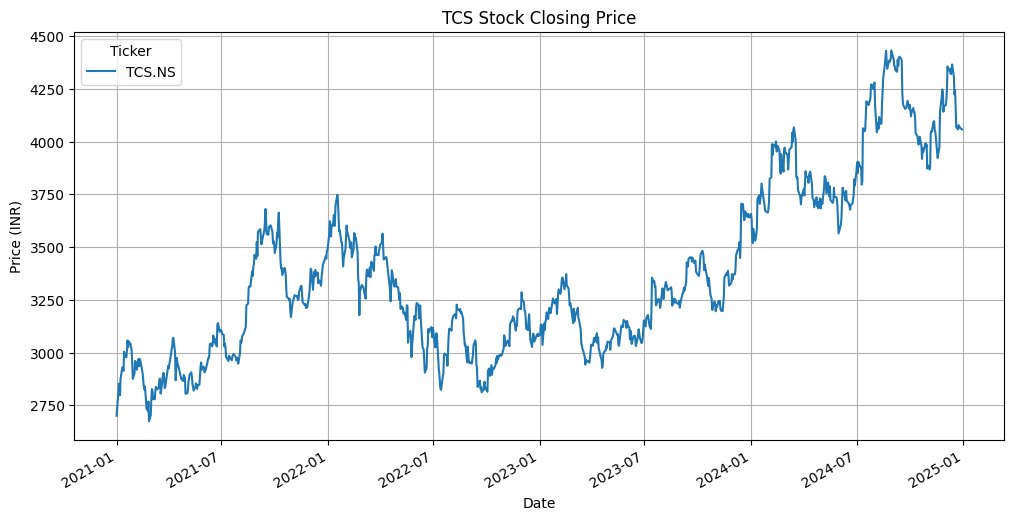

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download data for TCS (TCS.NS) from Jan 2021 to Dec 2024
df = yf.download("TCS.NS", start="2021-01-01", end="2024-12-31")

# Step 2: Show first 5 rows
print(df.head())

# Step 3: Plot closing price
df['Close'].plot(figsize=(12,6), title="TCS Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()


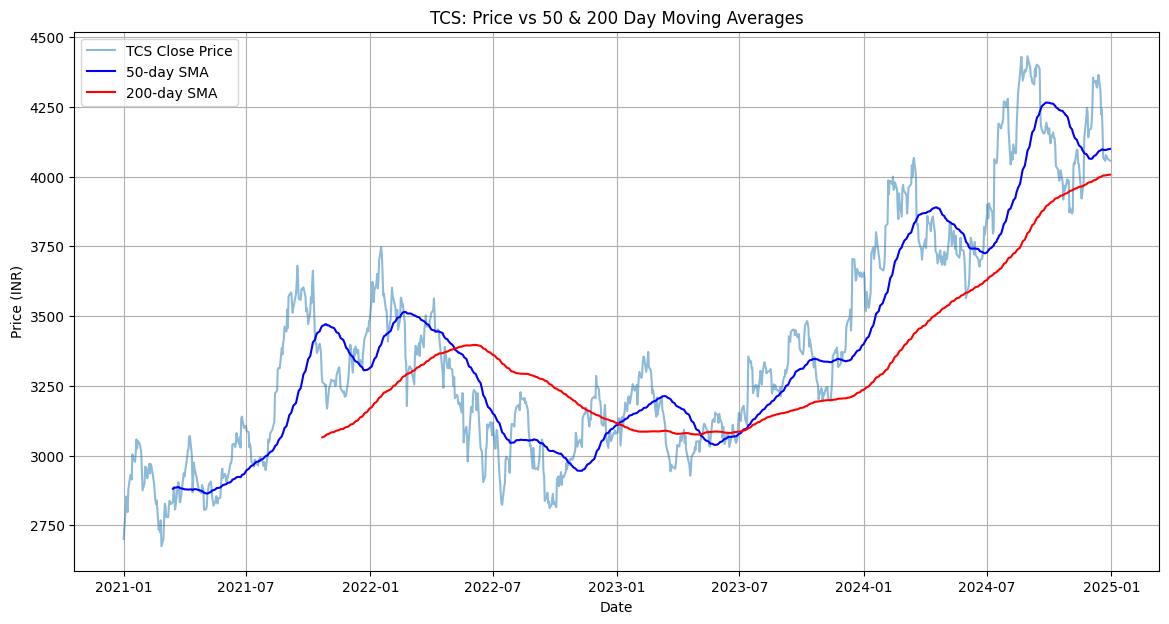

In [4]:
# Calculate 50-day and 200-day Simple Moving Averages
df['SMA50'] = df['Close'].rolling(window=50).mean()
df['SMA200'] = df['Close'].rolling(window=200).mean()

# Plot Closing Price + Moving Averages
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='TCS Close Price', alpha=0.5)
plt.plot(df['SMA50'], label='50-day SMA', color='blue')
plt.plot(df['SMA200'], label='200-day SMA', color='red')
plt.title("TCS: Price vs 50 & 200 Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Create a column for signals
df['Signal'] = 0  # 0 means 'Hold'

# If SMA50 > SMA200 → Buy (1), else if SMA50 < SMA200 → Sell (-1)
df['Signal'][df['SMA50'] > df['SMA200']] = 1
df['Signal'][df['SMA50'] < df['SMA200']] = -1


<ipython-input-5-2331920251>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][df['SMA50'] > df['SMA200']] = 1
<ipython-input-5-2331920251>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][df['SMA50'] > df['SMA200']] = 1
<ipython-input-5-2331920251>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][df['SMA50'] < df['SMA200']] = -1
<ipython-input-5-2331920251>:6: SettingWithCopyWarning: 
A value is t

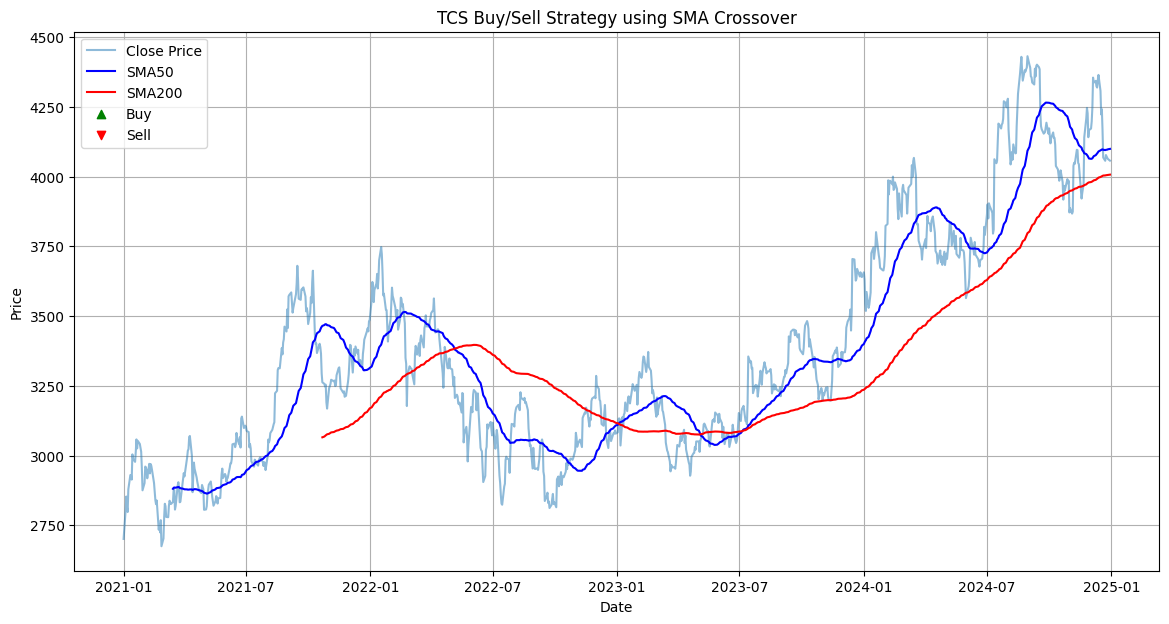

In [6]:
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['SMA50'], label='SMA50', color='blue')
plt.plot(df['SMA200'], label='SMA200', color='red')

# Plot Buy (green dot) and Sell (red dot)
buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == -1]

plt.scatter(buy_signals.index, buy_signals['Close'], label='Buy', marker='^', color='green', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Close'], label='Sell', marker='v', color='red', alpha=1)

plt.title("TCS Buy/Sell Strategy using SMA Crossover")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Create a 'Position' column (1 if holding stock, 0 if not)
df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')  # Carry forward previous signal

# Calculate daily returns
df['Market_Return'] = df['Close'].pct_change()

# Strategy returns = Market return * Position
df['Strategy_Return'] = df['Market_Return'] * df['Position']

# Cumulative returns
initial_capital = 100000
df['Strategy_Wealth'] = initial_capital * (1 + df['Strategy_Return']).cumprod()
df['Market_Wealth'] = initial_capital * (1 + df['Market_Return']).cumprod()


<ipython-input-7-4023489437>:2: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')  # Carry forward previous signal


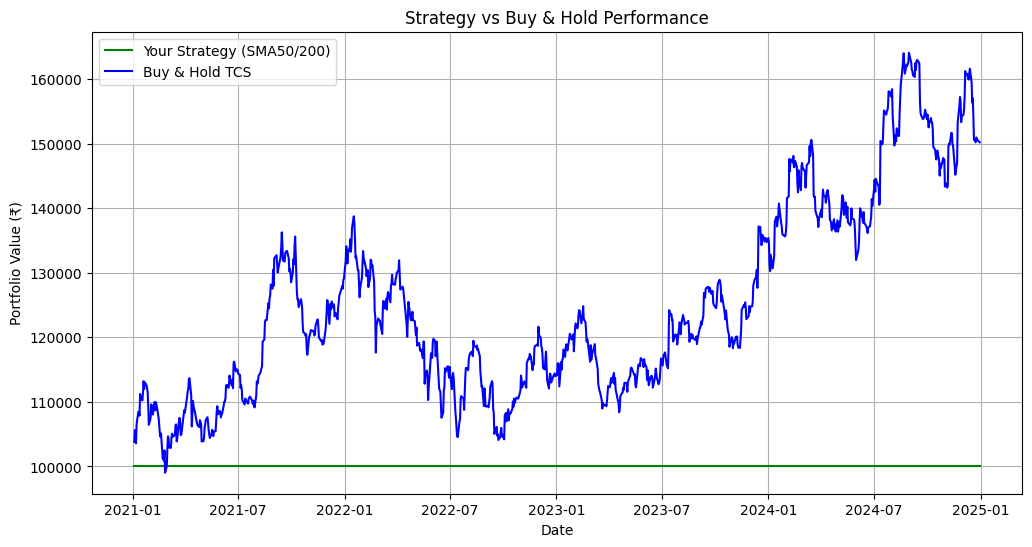

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['Strategy_Wealth'], label='Your Strategy (SMA50/200)', color='green')
plt.plot(df['Market_Wealth'], label='Buy & Hold TCS', color='blue')
plt.title('Strategy vs Buy & Hold Performance')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (₹)')
plt.legend()
plt.grid(True)
plt.show()
